# Titanic Passenger Survival Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
titanic_data=pd.read_csv("C:/Users/acer/Downloads/Titanic Data Set/train.csv")

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Cabin is dropped due to multiple null values

In [7]:
titanic_data=titanic_data.drop("Cabin",axis=1)

In [8]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [9]:
titanic_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Visualization of Data

Text(0, 0.5, 'Number of people')

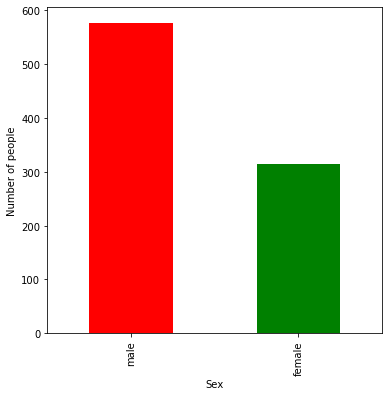

In [10]:
plt.figure(figsize=(6,6))
ax = titanic_data["Sex"].value_counts().plot(kind="bar", color=list('rgbkymc'))
plt.xlabel("Sex")
plt.ylabel("Number of people")

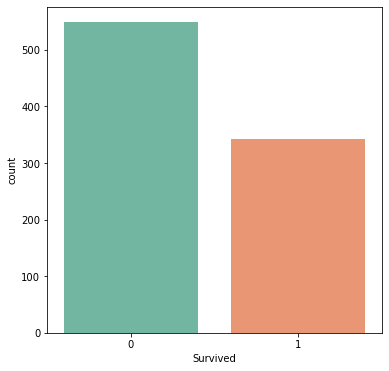

In [11]:
plt.figure(figsize=(6, 6))
sns.set_palette("Set2")
sns.countplot('Survived',data=titanic_data)

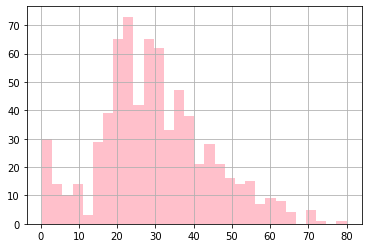

In [12]:
titanic_data['Age'].hist(bins=30,color='pink')

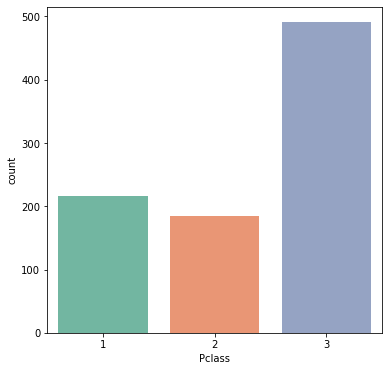

In [13]:
plt.figure(figsize=(6, 6))
sns.countplot('Pclass',data=titanic_data)

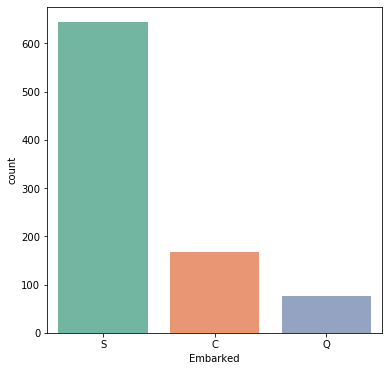

In [14]:
plt.figure(figsize=(6, 6))
sns.countplot('Embarked',data=titanic_data)

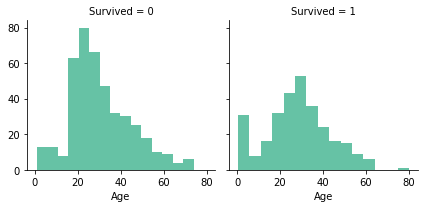

In [15]:
Survival_of_age = sns.FacetGrid(titanic_data, col='Survived')
Survival_of_age.map(plt.hist, 'Age', bins=15)

C:\Users\acer\Anaconda3\envs\ult\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


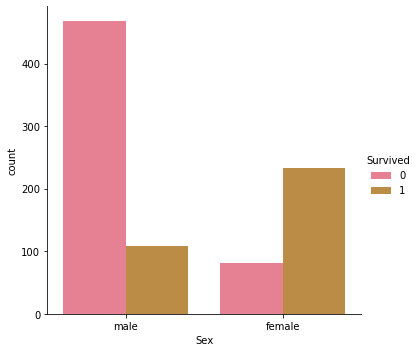

In [16]:
sns.set_palette("husl",8)
sns.factorplot('Sex',data=titanic_data,hue='Survived',kind='count')

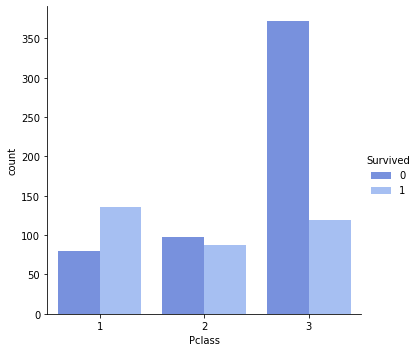

In [17]:
sns.set_palette("coolwarm")
sns.factorplot('Pclass',data=titanic_data,hue='Survived',kind='count')

### Data Preprocessing 

In [18]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### Dropping Columns which has minimum effect on survival of a person

In [19]:
titanic_data=titanic_data.drop(["Name","PassengerId","Ticket"],axis=1)

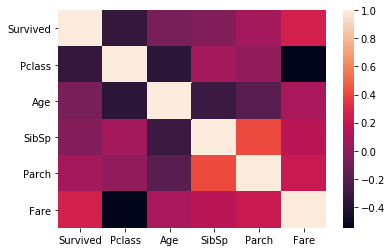

In [20]:
correlation=titanic_data.corr()
sns.heatmap(correlation)

#### Data Preprocessing

In [21]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [22]:
titanic_data=titanic_data.dropna(subset=["Embarked"])

In [23]:
mean_age=titanic_data["Age"].mean()

In [24]:
titanic_data["Age"].fillna(mean_age,inplace=True)

In [25]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [27]:
label=preprocessing.LabelEncoder()
titanic_data["Sex"]=label.fit_transform(titanic_data["Sex"])
titanic_data["Embarked"]=label.fit_transform(titanic_data["Embarked"])

In [28]:
x=titanic_data.drop("Survived",axis=1)

In [29]:
y=titanic_data["Survived"]

In [30]:
minmax=preprocessing.MinMaxScaler()
x=minmax.fit_transform(x)

In [54]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0,stratify=y)

#### Model Implementation and Evaluation

In [55]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_lr=lr.predict(X_test)

In [57]:
print("Accuracy of model is:",accuracy_score(y_test,y_lr)*100)

Accuracy of model is: 80.26905829596413


In [58]:
print("The classification matrix for data is:")
confusion_matrix(y_test, y_lr)

The classification matrix for data is:


array([[119,  19],
       [ 25,  60]], dtype=int64)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
y_rf=rf.predict(X_test)

In [61]:
print("Accuracy of model is:",accuracy_score(y_test,y_rf)*100)

Accuracy of model is: 82.95964125560538


In [52]:
print("The classification matrix for data is:")
confusion_matrix(y_test, y_rf)

The classification matrix for data is:


array([[113,  19],
       [ 28,  63]], dtype=int64)

In [69]:
from sklearn.neural_network import MLPClassifier

mlp=clf = MLPClassifier(hidden_layer_sizes=(100,80,40), max_iter=500, alpha=0.01,
                     solver='sgd', verbose=10 )

In [70]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.70992050
Iteration 2, loss = 0.70557635
Iteration 3, loss = 0.69931349
Iteration 4, loss = 0.69196672
Iteration 5, loss = 0.68442978
Iteration 6, loss = 0.67732685
Iteration 7, loss = 0.66983388
Iteration 8, loss = 0.66303108
Iteration 9, loss = 0.65642103
Iteration 10, loss = 0.65039687
Iteration 11, loss = 0.64460118
Iteration 12, loss = 0.63947595
Iteration 13, loss = 0.63459807
Iteration 14, loss = 0.63039086
Iteration 15, loss = 0.62684124
Iteration 16, loss = 0.62324090
Iteration 17, loss = 0.62059260
Iteration 18, loss = 0.61786470
Iteration 19, loss = 0.61571720
Iteration 20, loss = 0.61343248
Iteration 21, loss = 0.61159511
Iteration 22, loss = 0.60975928
Iteration 23, loss = 0.60797214
Iteration 24, loss = 0.60637986
Iteration 25, loss = 0.60478692
Iteration 26, loss = 0.60333968
Iteration 27, loss = 0.60182848
Iteration 28, loss = 0.60040861
Iteration 29, loss = 0.59900715
Iteration 30, loss = 0.59765147
Iteration 31, loss = 0.59627735
Iteration 32, los

C:\Users\acer\Anaconda3\envs\ult\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 80, 40), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [71]:
y_mlp=mlp.predict(X_test)

In [72]:
print("Accuracy of model is:",accuracy_score(y_test,y_mlp)*100)

Accuracy of model is: 81.16591928251121


In [73]:
print("The classification matrix for data is:")
confusion_matrix(y_test, y_mlp)

The classification matrix for data is:


array([[120,  18],
       [ 24,  61]], dtype=int64)